
# <center>Analyzing the Grand Tours Part I: The Speed of the Tour de France</center>
## <center>Dylan Wiwad</center>
### <center>April 28th, 2018</center>



In this short post I'm going to do the first set of two visualizations exploring data regarding the grand tours that I pulled from Wikipedia. Specifically, here I'm going to look at a couple elements of the Tour de France over it's entire 114 year history. Namely, I'm going to look at the length of the Tour, the average speed of the winner for each edition, their total winning time, and the margin that they won by.

I'm not intending to do any inferential analyses, but what I'm expecting to see is that the Tour is getting faster and shorter, and is being won on smaller margins as time goes on. I'm going to hide all of the code in this particular notebook, but I will display some of the raw data and explain the process as I go along just so you can see where I started and where I got to, and then what those data actually look like. If you are interested in the more technical aspects of how I did all of these analyses, there is a seperate jupyter notebook in the repository I put up on github for this particular project (LINK). This notebook has more detailed info on what I'm doing in each particular step. If you want to see the code, without any detailed explanation, simply click the "Show Code" button below.

With that, let's get right into the data!

## Tour de France GC Winner's Data

I grabbed these data from the wikipedia page for Tour GC winners, which can be found here: https://en.wikipedia.org/wiki/List_of_Tour_de_France_general_classification_winners

Let's take a quick look at these raw data; what does it look like once scraped from wikipedia and cleaned a little bit?

In [1]:
import requests

# Choose the table and pull it out
response = requests.get("https://en.wikipedia.org/wiki/List_of_Tour_de_France_general_classification_winners")
content = response.content

# Parse the HTML
from bs4 import BeautifulSoup
parser = BeautifulSoup(content, 'html.parser')

# Grab the table - I know it's the second table on the page so I just grabbed it by index
winners_table = parser.find_all('table')[1]

import pandas as pd
import numpy as np

# Getting an error where it says there is no lxml, so the google tells me to get it
# to explicitly fall back on html5lib
data = pd.read_html(str(winners_table), flavor='html5lib')
data = data[0]

data[1:6]


,0,1,2,3,4,5,6,7,8
1,1903,France,"Garin, MauriceMaurice Garin",La Française,"2,428 km (1,509 mi)","094 !94h 33' 14""","24921 !+ 2h 59' 21""",3,6
2,1904,France,"Garin, MauriceMaurice Garin Cornet, HenriHenri...",Conte,"2,428 km (1,509 mi)","096 !96h 05' 55""","21614 !+ 2h 16' 14""",1,3
3,1905,France,"Trousselier, LouisLouis Trousselier",Peugeot–Wolber,"2,994 km (1,860 mi)",35,26,5,10
4,1906,France,"Pottier, RenéRené Pottier",Peugeot–Wolber,"4,637 km (2,881 mi)",31,8,5,12
5,1907,France,"Petit-Breton, LucienLucien Petit-Breton",Peugeot–Wolber,"4,488 km (2,789 mi)",47,19,2,5


In [2]:
data[110:115]

,0,1,2,3,4,5,6,7,8
110,2012,Great Britain,"Wiggins, BradleyBradley Wiggins",Team Sky,"3,496 km (2,172 mi)","087 !87h 34' 47""","00321 !+ 3' 21""",2,14
111,2013,Great Britain,"Froome, ChrisChris Froome",Team Sky,"3,404 km (2,115 mi)","083 !83h 56' 20""","00420 !+ 4' 20""",3,14
112,2014,Italy,"Nibali, VincenzoVincenzo Nibali",Astana,"3,660.5 km (2,274.5 mi)","089 !89h 59' 06""","00737 !+ 7' 37""",4,19
113,2015,Great Britain,"Froome, ChrisChris Froome*",Team Sky,"3,360.3 km (2,088.0 mi)","084 !84h 46' 14""","00112 !+ 1' 12""",1,16
114,2016,Great Britain,"Froome, ChrisChris Froome",Team Sky,"3,529 km (2,193 mi)","089 !89h 04' 48""","00405 !+ 4' 05""",2,14


We've got a lot of interesting information in this table, including the winner, their team, the number of stage wins, etc. However, given that I'm focusing here on speed of the tour, I'm going to pull out all the information I need and put it into one smaller new table. That is, I'll pull out the columns for distance, time, and margin. 

From this, I'll calculate a new column, average speed, which is simply the total distance divided by the winning time. Here's what the new cleaned up data look like:

In [3]:
# Remove the header and put it in its own dataset
headers = data[:1]
data = data[1:]

# Winning Times -------------------------------------------------------------------
# Lets just get the times out here so we can start working with them.
times = data[5][0:len(data)]

# We don't want to count the years where it was points to win, so I'm just going to 
# convert those rows to None - we want to keep the NAs for viz purposes. 

times[2:10] = None
times[12:16] = None

# First split everything on space
import regex as re

# This turns it into a list of split times
new_times = []
for elt in times:
    elt = str(elt)
    elt = re.sub('[h!\'\"]', '', elt)
    elt = elt.split(' ')
    new_times.append(elt)

# Iterates over the times, doing the division and math, turns that
# first redundant column into the total time, skipping
# the missing years
for elt in new_times:
    try:
        for idx, val in enumerate(elt):
            elt[idx] = float(elt[idx])
        elt[2] = (elt[2]/60)
        elt[3] = ((elt[3]/60)/60)
        elt[0] = elt[1] + elt[2] + elt[3]
    except:
        pass

# This makes a list called totals, and adds all our finalized times to it. This
# is the final form of the winning times data
totals = []
for elt in new_times:
    totals.append(elt[0])

# Distance -----------------------------------------------------------------------
# Pulls out the distance column
dist = data[4][0:len(data)]

# Want to make None all the same columns as before. 
# Including deleting some distances that we do have but
# where the TdF was scored on points - no avg speeds.
dist[12:16] = None

# Just some cleaning to get rid of characters we don't want
new_dist = []
for elt in dist:
    # Some weird ascii was getting my loop hung up
    try:
        elt = elt.encode('utf-8')
    except:
        pass
    elt = str(elt)
    # weird stuff around the km and mi text, remove it
    elt = re.sub('\\xc2\\xa0km', '', elt)
    elt = re.sub('\\xc2\\xa0mi', '', elt)
    elt = re.sub(',', '', elt)
    elt = elt.split(' ')
    new_dist.append(elt)

# Makes a list called final distance, this is all the distance data we're going to
# work with
final_dist = []
for elt in new_dist:
    try:
        elt = float(elt)
    except:
        pass
    final_dist.append(elt[0])

# Winning Margins ----------------------------------------------------------------
# Grab the winning margin column
margin = data[6][0:len(data)]

# Want to make None all the same columns as before. 
# Including deleting some distances that we do have but
# where the TdF was scored on points - no avg speeds.
margin[2:10] = None
margin[12:16] = None

# Same cleaning as the other two lists
new_margin = []
for elt in margin:
    elt = str(elt)
    elt = re.sub('[!\"]', '', elt)
    elt = elt.split('+')
    new_margin.append(elt)

time_only = []
for elt in new_margin:
    try:
        time_only.append(elt[1])
    except:
        time_only.append(elt[0])

test = []

# There was some weird stuff going on with the margin columns. This is because some
# years the tour was won by hours so there was a third element (hours, mins, secs as
# opposed to just mins and seconds). Need to clean that up and make sure everything
# has an hours even if its 0
for elt in time_only:
    if '\'' not in elt and elt != 'None' and elt != 'nan':
        elt = "0h 0 %s" % elt
    elif 'h' not in elt and elt != 'None' and elt != 'nan':
        elt = "0h %s" % elt
    elt = elt.lstrip()
    elt = elt.split()
    test.append(elt)

# Clean it all up, getting rid of misc characters
last_test = []

for elt in test:
    elt = str(elt)
    elt = re.sub('[h\"\']', '', elt)
    elt = elt.split()
    elt = [re.sub('\[', '', i) for i in elt]
    elt = [re.sub('\]', '', i) for i in elt]
    elt = [re.sub(',', '', i) for i in elt]
    last_test.append(elt)

# Just inserting a new indexed column
for elt in last_test:
    if elt == 'None' or elt == 'nan':
        pass
    else:
        elt = elt.insert(3,0)

# Now do the math to convert it all into seconds
for elt in last_test:
    try:
        for idx, val in enumerate(elt):
            elt[idx] = float(elt[idx])
        elt[0] = ((elt[0]*60)*60)
        elt[1] = ((elt[1]*60))
        elt[3] = elt[0] + elt[1] + elt[2]
    except:
        pass

# And append all the winning margins into a new list called winning_margins
# this is the final data for margins
winning_margins = []

for elt in last_test:
    try:
        winning_margins.append(elt[3])
    except:
        winning_margins.append('None')
        
# Combine them all into a df -----------------------------------------------------
winning_time = pd.DataFrame({'winning time':totals})
distance = pd.DataFrame({'total distance':final_dist})
margin_won = pd.DataFrame({'time gap':winning_margins})
final_data = pd.merge(winning_time,distance, left_index=True, right_index=True)
final_data = pd.merge(final_data, margin_won, left_index=True, right_index=True)

# Convert all the "None' to proper missing values
for row in final_data['winning time']:
    if row == 'None':
        row = None
for row in final_data['total distance']:
    if row =='None':
        row = None
for row in final_data['time gap']:
    if row == 'None':
        row = None

# Make everything numeric 
final_data['winning time'] = pd.to_numeric(final_data['winning time'], errors='coerce')
final_data['total distance'] = pd.to_numeric(final_data['total distance'], errors='coerce')
final_data['time gap'] = pd.to_numeric(final_data['time gap'], errors='coerce')

# Finally doing the math for average speed
final_data['avg speed'] = final_data['total distance'] / final_data['winning time']
final_data[1:6]


,winning time,total distance,time gap,avg speed
1,96.098611,2428.0,8174.0,25.265714
2,NaN,2994.0,NaN,NaN
3,NaN,4637.0,NaN,NaN
4,NaN,4488.0,NaN,NaN
5,NaN,4497.0,NaN,NaN


In [4]:
final_data[110:115]

,winning time,total distance,time gap,avg speed
110,83.938889,3404.0,260.0,40.553313
111,89.985000,3660.5,457.0,40.679002
112,84.770556,3360.3,72.0,39.639943
113,89.080000,3529.0,245.0,39.616075
114,86.348611,3540.0,54.0,40.996606


So here is the data that we're going to work with from now on. We've got winning time in hours, total distance in kilometers, winning margin in seconds, and then average speed in kilometers per hour. Let's take a look now, and see how things have changed over time.

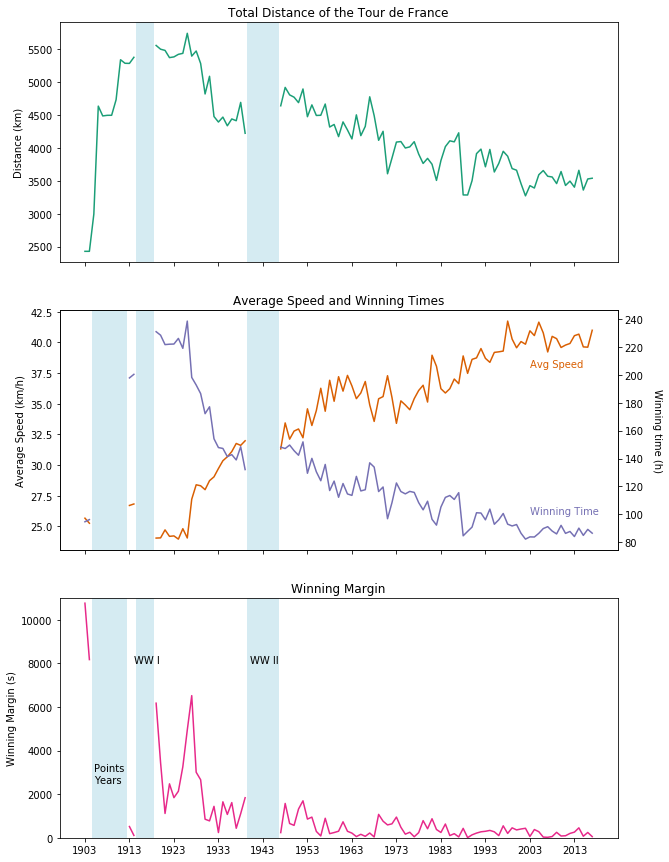

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

# Short ten-year label set for the x-axis
xlabels = ['1903', '1913', '1923', '1933', '1943', '1953', '1963', '1973', '1983',
           '1993', '2003', '2013']

# This will be my master graph. Things I wanna highlight later can be split up... 
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(10,15))

ax2= ax[1].twinx()

# Throw up the line plots
ax[0].plot(final_data['total distance'], color = '#1B9E77')
ax[0].set_xticks(np.arange(0,115,10))
ax[0].set_xticklabels(xlabels)
ax[1].plot(final_data['avg speed'], color='#D95F02')
ax2.plot(final_data['winning time'], color = '#7570B3')
ax[2].plot(final_data['time gap'], color = '#E7298A')

ax[2].set_ylim(0, 11000)

# Put in some bands that highlight the World Wars, and the years the Tour was on pts
for i in range(0,3):
    ax[i].axvspan(11.5, 15.5, facecolor='lightblue', alpha=0.5)
    ax[i].axvspan(36.5, 43.5, facecolor='lightblue', alpha=0.5)
# The first one (distance) doesn't need the points years greyed out
for i in range(1,3):
    ax[i].axvspan(1.5, 9.5, facecolor='lightblue', alpha=0.5)

# Label all the axes
ax[0].set_title('Total Distance of the Tour de France')
ax[0].set_ylabel('Distance (km)')
ax[1].set_title('Average Speed and Winning Times')
ax[1].set_ylabel('Average Speed (km/h)')
ax[2].set_title('Winning Margin')
ax[2].set_ylabel('Winning Margin (s)')
ax2.set_ylabel('Winning time (h)', rotation=-90)
ax2.yaxis.set_label_coords(1.08,.5)

# Insert some custom text just to explain the legend and the gaps in data
ax[1].text(100,38, 'Avg Speed', color='#D95F02')
ax[1].text(100,26, 'Winning Time', color='#7570B3')
ax[2].text(2,2500, 'Points \nYears')
ax[2].text(11,8000, 'WW I')
ax[2].text(37,8000, 'WW II')

plt.show()

There's tons of interesting things going on here! One thing to note first, is the blue bars correspond to missing data - as in, years where there was no Tour de France, or the Tour was structured differently. First, between 1905 and 1912 the Tour was scored on points so there is no distance and time data there. Second (and third), the Tour was not run during either of the World Wars. So, brushing over that let's dive into the data.

I'll focus first on the top and bottom graphs, because most of the interesting stuff, in my opinion, is in the middle. First, the Tour has been getting shorter since right around WW I. This isn't entirely surprising because back in the early 20th century the Tour was envisioned as a savage race for only the hardest men, where only one man would actually make it to the end. So, over the years the Tour has gotten shorter but still a formidable distance.

Second, the winning margin was huge back when the Tour was inhumanely difficult - the margin was in the realm of hours. However, since the 1950s the winning margin has been in the realm of minutes or seconds. We'll dive a bit deeper into this later on.

Lastly, the overall winning time and average speed. This is where stuff gets a bit more interesting! The overall winning time has been getting lower and lower, which makes sense given the tour has gotten shorter and faster. The tour has been getting consistently faster over the years, even over just the last few decades. In fact, the average speed was still around 32kmh in the early 1970s and was over 40 kmh the last few years. Thats nearly a 20% increase in average speed over four decades. Average speed seemed to increase pretty sharply from the 1960s to the early 2000s, but has seemed pretty consistent since then. I did, however, notice some interesting blips in the 1990s and 2000s. Let's dive a little bit deeper in the speed data for those years.

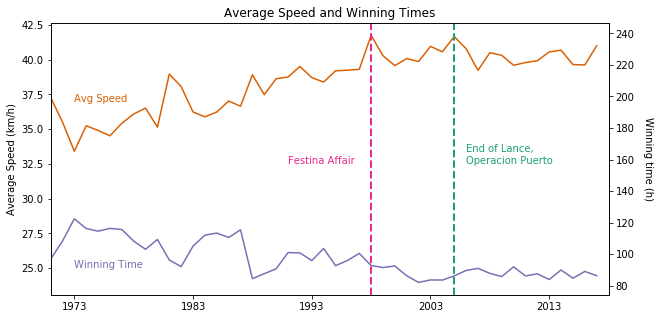

In [7]:
fig, ax = plt.subplots(sharex=True, sharey=False, figsize=(10,5))
ax2= ax.twinx()
xlabels2 = [0,0,0,0,0,0,'1963', '1973', '1983', '1993', '2003', '2013']

ax.plot(final_data['avg speed'], color='#D95F02')
ax2.plot(final_data['winning time'], color = '#7570B3')
ax.set_xticks(np.arange(0,115,10))
ax.set_xticklabels(xlabels2)
ax.set_xlim(68,115)

ax.axvline(102, color='#1B9E77', linewidth=2, linestyle='--')
ax.axvline(95, color='#E7298A', linewidth=2, linestyle='--')
ax.text(88,32.5, 'Festina Affair', color='#E7298A')
ax.text(103,32.5, 'End of Lance, \nOperacion Puerto',color='#1B9E77')

ax.set_title('Average Speed and Winning Times')
ax.set_ylabel('Average Speed (km/h)')
ax2.set_ylabel('Winning time (h)', rotation=-90)
ax2.yaxis.set_label_coords(1.08,.5)

ax.text(70,37, 'Avg Speed', color='#D95F02')
ax.text(70,25, 'Winning Time', color='#7570B3')

plt.show()

When we zoom in on the last 46 years (1971-2017) we can see this pattern a little bit more clearly. When zoomed in, the pattern of the Tour getting faster looks a little bit less remarkable, but I think it's still quite amazing when you unpack what these numbers are actually showing. I'm going to focus on the average speed column. 

While they don't look like *huge* peaks, you'll notice that the year of the Festina Affair and the last year of Lance (one year before Operacion Puerto) are the fastest edtions of the tour in the last half century - this is not over a trivial time frame. Even when you think about the advancements in bike, kit, and athlete training technology over the last decade, Lance in his last year was still faster than the current pros who have ten extra years of engineering underneath them.

The other bit, is that even though the slope of the average speed line doesn't look crazy - it's actually quite steep. The average speed of the Tour has increased by about 6 km/h since the 1970s, which is an increase of about  17%. All this while the tour has remained relatively consistent in its distance of about 3,500 km. 

It would be nice to be able to factor in total elevation data (maybe they're faster now because they're climbing less), but I can't find these data anywhere.

The general pattern seems to me to be twofold: (1) The tour is getting faster and faster and (2) There were relatively big drops in average speed after each major doping scandal, followed by slow and steady increases in speed (including over the last twelve years).

That being said, I don't think the Tour will actually get substantially faster without drastic changes to the route or UCI rules. For instance, I can't see the average speed hitting the mid-forties.

Lastly, I'm going to zoom in a bit on the winning margins.

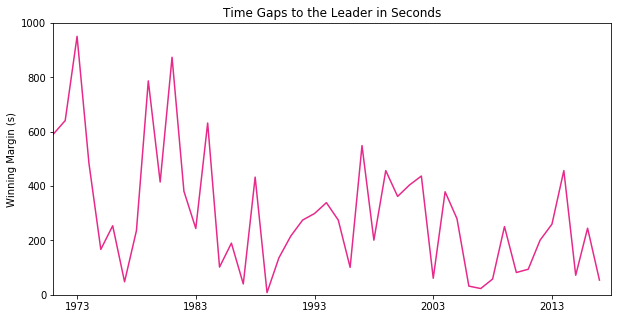

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(final_data['time gap'], color='#E7298A')
ax.set_xticks(np.arange(0,115,10))
ax.set_xticklabels(xlabels2)
ax.set_ylim(0,1000)
ax.set_xlim(68,115)

ax.set_title('Time Gaps to the Leader in Seconds')
ax.set_ylabel('Winning Margin (s)')

plt.show()

When we zoom in on the winning margins, we can see there is still a slight slope down. The time gap to the winner is getting smaller and smaller over time. Again, it doesn't seem like much but the slope of this line goes down from ten minutes in 1971 (~ 600 seconds) to just 54 seconds in 2017. Again, I don't think there's really anywhere to go from here though. I suspect we will just continue to see the Tour being won on margins of less than a minute for the foreseeable future, unless there are major shakeups to the UCI's rules.

## Limitations

The biggest limitation of these basic visualizations, particularly the data about average speed, is that I would like to factor in the elevation gain for a given tour. The speed info is hard to interpret without it. For instance, a tour with 10 flat sprinters stages is likely to be faster, on average, than a tour with only 3. This doesn't mean riders are getting faster overall, it just means the structure of the Tour was weighted towards faster stages. Unfortunately, I cannot find these data anywhere. I think we can assume though, that changes in the structure of the Tour don't explain all changes in speed over the last few decades, where the race is very much a climbers race.